In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data=pd.read_csv(r'insurance.csv')

In [67]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [68]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# data preprocessing

In [69]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [71]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [72]:
data.shape

(1338, 7)

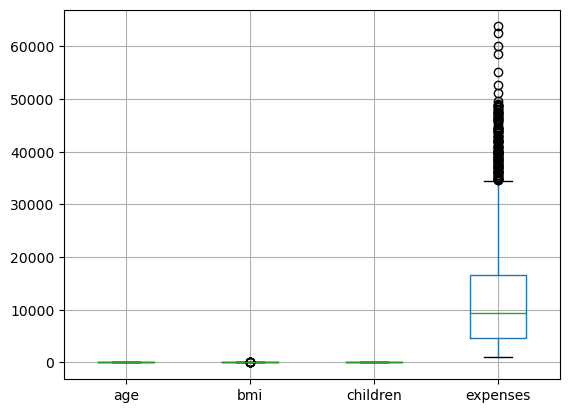

In [73]:
#outlier detection

data.boxplot()
plt.show()

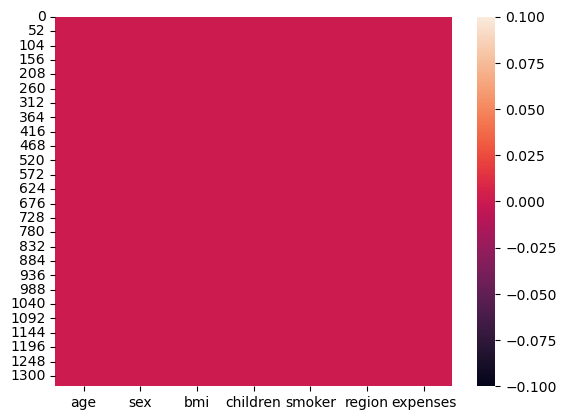

In [74]:
sns.heatmap(data.isnull())
plt.show()

In [75]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [76]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [77]:
data['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [78]:
#converting categorical features into numerical

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [80]:
data['sex'] =le.fit_transform(data['sex'])
data['region'] =le.fit_transform(data['region'])
data['smoker'] =le.fit_transform(data['smoker'])

In [81]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


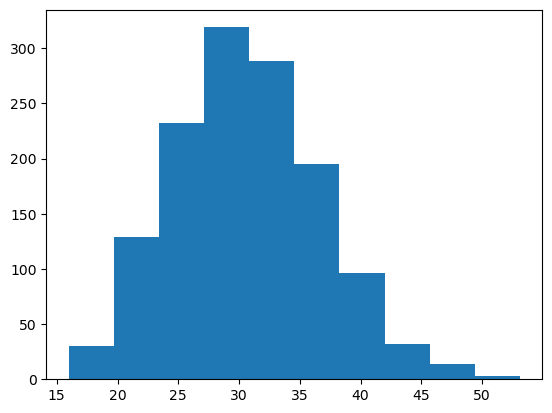

In [89]:
plt.hist(data.bmi)
plt.show()

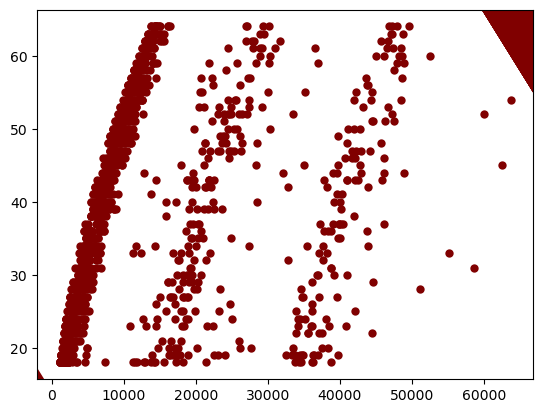

In [90]:
plt.scatter(data.expenses,data.age,color="maroon",linewidths=800)
plt.show()

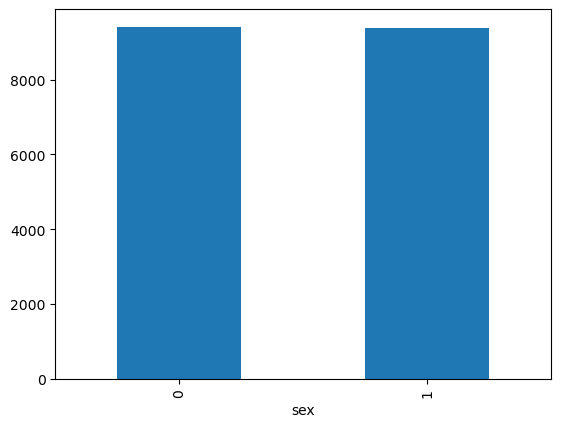

In [91]:
data.groupby("sex")['expenses'].median().plot.bar()
plt.show()

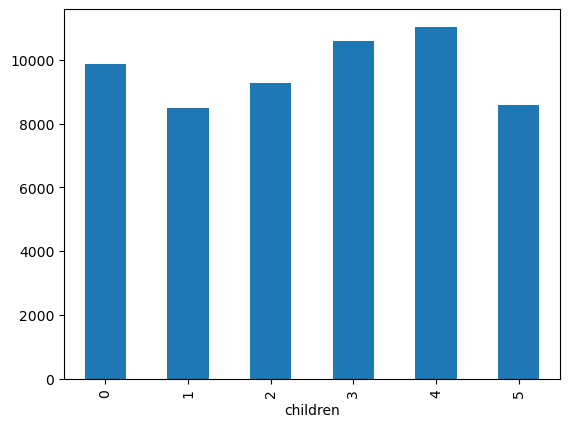

In [93]:
data.groupby("children")["expenses"].median().plot.bar()
plt.show()

In [26]:
data.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


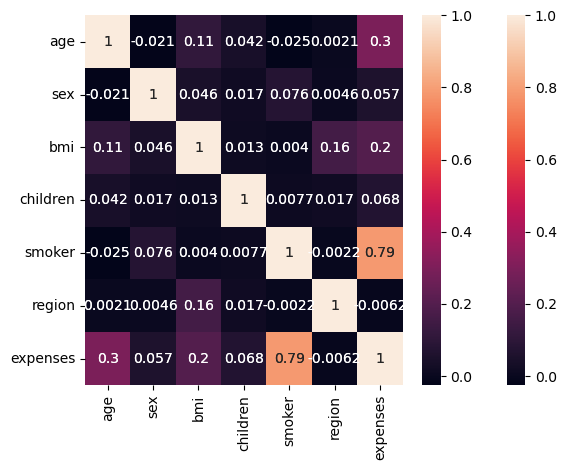

In [28]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [32]:
x=data.iloc[:,:-1]

In [33]:
y=data['expenses']

# model building and training

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
x_train.shape

(1070, 6)

In [38]:
y_test.shape

(268,)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [47]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [49]:
model1.score(x_test,y_test)

0.7318924035440308

In [52]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
model2.score(x_test,y_test)

0.8302686999971854

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor()
model3.fit(x_train,y_train)

GradientBoostingRegressor()

In [57]:
model3.score(x_test,y_test)

0.8506097146269798

In [58]:
# accuracy and performance

In [63]:
y_pred=model3.predict(x_test)

In [64]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

0.8214277307123115